# This file will serve as an analysis tool for efficiency comparisons.

In [1]:
# We will need these packages for visualization
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Here we will define some plotting functions
def plot_hashmap(hashmap_file, lims, legendTitle, ymax = None):
    hashmap_data = pd.read_csv(hashmap_file)

    caps_data = []
    for lim in lims:
        caps_data.append(hashmap_data[hashmap_data['capacity'] == lim * 5])

    plt.figure(figsize=(10, 5))
    for index, cap in enumerate(caps_data):
        plt.subplot(1, len(caps_data), index + 1)
        plt.title(f"Capacity {lims[index] * 5}")
        plt.xlabel('Threads')
        plt.ylabel('Runtime (ms)')
        if (ymax != None):
            plt.ylim([0, ymax])
        for lim in lims:
            plt.plot('threads', 'runtime', data = cap[cap['limit'] == lim])
        plt.legend(lims, loc = 'upper right', title = legendTitle)

    plt.tight_layout()
    plt.show()
    
def plot_stl_hashmap(hashmap_file, lims):
    hashmap_data = pd.read_csv(hashmap_file)
    
    plt.figure(figsize=(10, 5))
    plt.title('Variable Capacity')
    plt.xlabel('Insertions')
    plt.ylabel('Runtime (ms)')
    plt.plot('limit', 'runtime', data = hashmap_data)
    
def plot_linked_list(linked_list_file, lims, ymax = None):
    linked_list_data = pd.read_csv(linked_list_file)
    
    plt.figure(figsize=(10, 5))
    plt.title(linked_list_file)
    plt.xlabel('Threads')
    plt.ylabel('Runtime (ms)')
    if (ymax != None):
        plt.ylim([0, ymax])
    for lim in lims:
        plt.plot('threads', 'runtime', data = linked_list_data[linked_list_data['limit'] == lim])
        
    plt.legend(lims, loc = 'upper right', title = 'Insertions')
    plt.show()
    
def compare_hashmap_stl(hashmap_file, stl_file, lims, threads):
    hashmap_data = pd.read_csv(hashmap_file)
    stl_data = pd.read_csv(stl_file)
    
    plt.figure(figsize=(15, 5))
    for index, lim in enumerate(lims):
        cap = lim * 5
        
        filtered = hashmap_data[hashmap_data['capacity'] == cap]

        plt.subplot(1, len(lims), index + 1)
        plt.title(f"Capacity {cap}")
        plt.xlabel('Insertions')
        plt.ylabel('Runtime (ms)')

        for thread in threads:
            plt.plot('limit', 'runtime', data = filtered[filtered['threads'] == thread])
        plt.plot('limit', 'runtime', '--', data = stl_data)

        plt.legend(threads + ['STL'], loc = 'upper left', title = 'Threads / STL')
    plt.show()

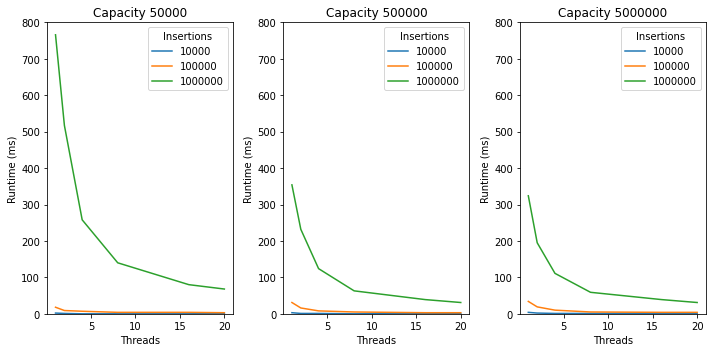

In [3]:
# Add-Only Hashmap
lims = [10_000, 100_000, 1_000_000]
plot_hashmap('data/add_only_hashmap.csv', lims, 'Insertions', 800)

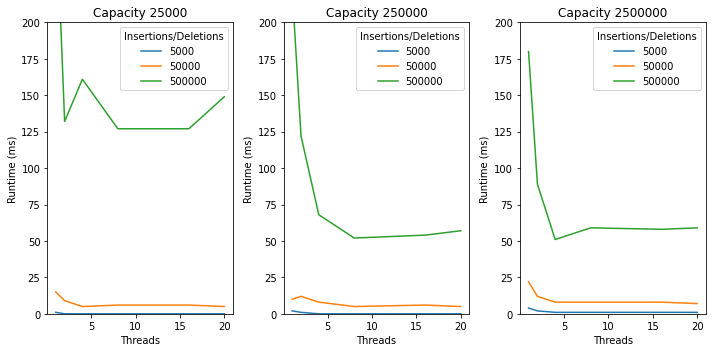

In [11]:
# Hashmap
lims = [5_000, 50_000, 500_000]
plot_hashmap('data/hashmap.csv', lims, 'Insertions/Deletions', 200)

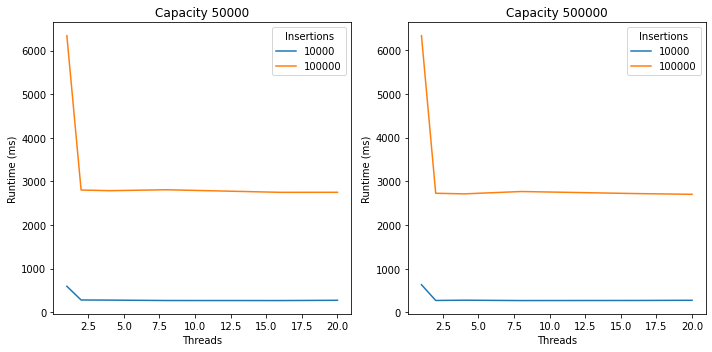

In [5]:
# Managed Hashmap
lims = [10_000, 100_000]
plot_hashmap('data/managed_hashmap.csv', lims, 'Insertions')

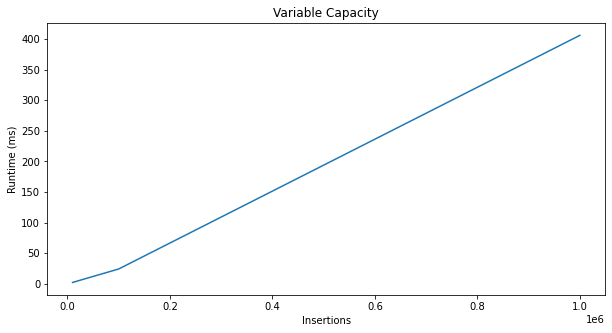

In [6]:
# STL Hashmap
lims = [10_000, 100_000, 1_000_000]
plot_stl_hashmap('data/stl_hashmap.csv', lims)

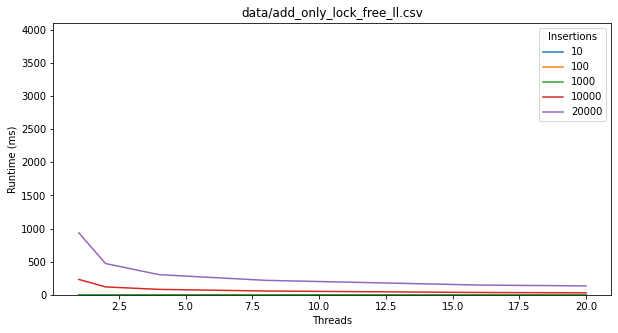

In [7]:
# Add Only Lock Free Linked List
lims = [10, 100, 1_000, 10_000, 20_000]
plot_linked_list('data/add_only_lock_free_ll.csv', lims, 4100)

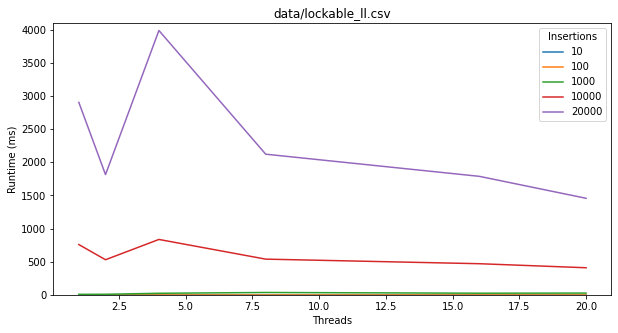

In [8]:
# Lockable Linked List
lims = [10, 100, 1_000, 10_000, 20_000]
plot_linked_list('data/lockable_ll.csv', lims, 4100)

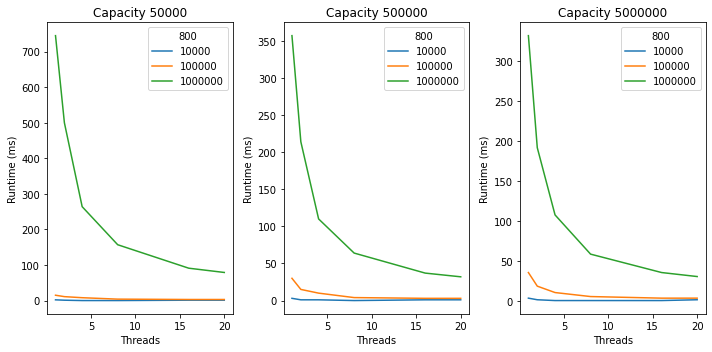

In [9]:
# Hashset
lims = [10_000, 100_000, 1_000_000]
plot_hashmap('data/hashset.csv', lims, 800)

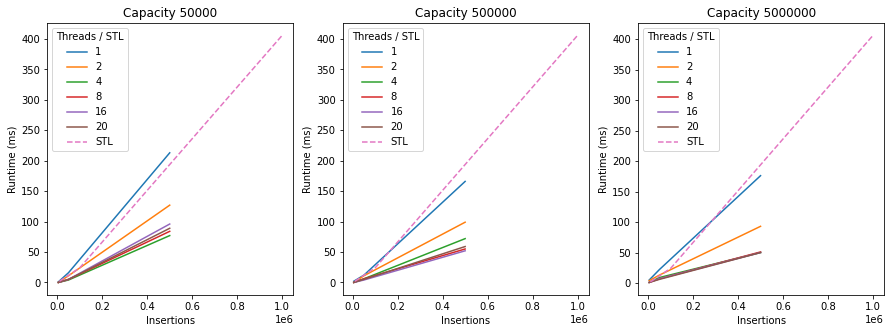

In [10]:
lims = [10_000, 100_000, 1_000_000]
threads = [1, 2, 4, 8, 16, 20]
compare_hashmap_stl('data/hashmap.csv', 'data/stl_hashmap.csv', lims, threads)